In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
plt.rc('figure', figsize=(10, 5))


In [2]:
df = pd.read_csv('votacao_candidato_munzona_2018_BRASIL.csv', sep = ';', encoding='latin-1')

In [3]:
df.shape

(9061048, 38)

In [4]:
df.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_VOTO_EM_TRANSITO,QT_VOTOS_NOMINAIS
0,01/08/2019,15:43:50,2018,2,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,07/10/2018,E,PR,PR,PARANÁ,74080,SANTA TEREZA DO OESTE,143,6,Deputado Federal,160000626135,1722,CASSIO LUIZ GOMES LOBATO MACHADO,CASSIO LOBATO,#NULO#,12,APTO,2,DEFERIDO,Coligação,17,PSL,Partido Social Liberal,160000050714,ENDIREITA BRASIL,PSL / PTC / PATRI,5,SUPLENTE,N,4
1,01/08/2019,15:43:50,2018,2,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,07/10/2018,E,RS,RS,RIO GRANDE DO SUL,89389,QUATRO IRMÃOS,148,6,Deputado Federal,210000603865,5448,ANA LUCIA FERREIRA DE MORAIS VEIGA,ANA LÚCIA MORAIS,#NULO#,12,APTO,2,DEFERIDO,Coligação,54,PPL,Partido Pátria Livre,210000050108,JUNTOS O RIO GRANDE TEM SOLUÇÃO,SOLIDARIEDADE / AVANTE / PPL / PODE,4,NÃO ELEITO,N,0
2,01/08/2019,15:43:50,2018,2,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,07/10/2018,E,RS,RS,RIO GRANDE DO SUL,85960,CAMARGO,62,6,Deputado Federal,210000603879,5400,MARCELO MARQUES BORGES,MARCELO BORGES,#NULO#,12,APTO,2,DEFERIDO,Coligação,54,PPL,Partido Pátria Livre,210000050108,JUNTOS O RIO GRANDE TEM SOLUÇÃO,SOLIDARIEDADE / AVANTE / PPL / PODE,4,NÃO ELEITO,N,0
3,01/08/2019,15:43:50,2018,2,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,07/10/2018,E,RS,RS,RIO GRANDE DO SUL,85391,BARROS CASSAL,54,7,Deputado Estadual,210000604707,12600,MARCUS SIQUEIRA DA CUNHA,MARCUS CUNHA,#NULO#,12,APTO,2,DEFERIDO,Coligação,12,PDT,Partido Democrático Trabalhista,210000050137,FRENTE TRABALHISTA,PDT / PMB,5,SUPLENTE,N,1
4,01/08/2019,15:43:50,2018,2,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,07/10/2018,E,RJ,RJ,RIO DE JANEIRO,58297,CORDEIRO,52,7,Deputado Estadual,190000609050,25050,NILTON GALDINO DA SILVA,NILTINHO MOTOTAXI,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,25,DEM,Democratas,190000050231,PARTIDO ISOLADO,DEM,5,SUPLENTE,N,0


In [5]:
df.DS_CARGO.value_counts()

Deputado Estadual     5503600
Deputado Federal      3311235
Presidente              94095
Senador                 80663
Governador              53481
Deputado Distrital      17974
Name: DS_CARGO, dtype: int64

In [6]:
droplist = ['DT_GERACAO', 'HH_GERACAO', 'CD_TIPO_ELEICAO', 'DT_ELEICAO', 'SG_UF', 'NM_UE', 'CD_CARGO', 'NM_PARTIDO']

In [7]:
df = df.drop(droplist, axis = 1)

In [8]:
df.sample(10)

,ANO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,TP_ABRANGENCIA,SG_UE,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_VOTO_EM_TRANSITO,QT_VOTOS_NOMINAIS
6901234,2018,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,E,PR,74721,RANCHO ALEGRE D OESTE,92,Deputado Estadual,160000623054,13600,MARGARETE LOPES IUNG,MARGOT JUNG,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,13,PT,160000050614,PARTIDO ISOLADO,PT,5,SUPLENTE,N,0
7363765,2018,Eleição Ordinária,1,295,ELEIÇÃO GERAL FEDERAL 2018,F,BR,69094,POPULINA,233,Presidente,280000629808,13,FERNANDO HADDAD,FERNANDO HADDAD,#NULO#,12,APTO,2,DEFERIDO,Coligação,13,PT,280000050703,O POVO FELIZ DE NOVO,PT / PC do B / PROS,6,2º TURNO,N,872
7712810,2018,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,E,PR,74900,VENTANIA,17,Deputado Estadual,160000622336,33360,APARECIDO CUSTODIO DA SILVA,CUSTODIO DA SILVA,#NULO#,12,APTO,4,INDEFERIDO COM RECURSO,Coligação,33,PMN,160000050593,"FIRME E FORTE, UNIDOS PELO PARANA",PROS / PMB / PMN,4,NÃO ELEITO,N,0
602372,2018,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,E,MG,43710,CONTAGEM,90,Deputado Estadual,130000615649,27222,ROBERTO CÉSAR DOS SANTOS,ROBERTO NEGÃO,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,27,DC,130000050417,PARTIDO ISOLADO,DC,5,SUPLENTE,N,0
886126,2018,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,E,SP,69132,PORTO FELIZ,100,Deputado Estadual,250000603048,51029,MARCOS ANDRE SANTOS MESSIAS,ANDRE SANTOS,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,51,PATRI,250000050086,PARTIDO ISOLADO,PATRI,5,SUPLENTE,N,0
7952133,2018,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,E,AP,6122,VITÓRIA DO JARI,7,Deputado Federal,30000602684,2200,EURISON DE ANDRADE DA SILVA,ERISON REAL,#NULO#,3,INAPTO,14,INDEFERIDO,Coligação,22,PR,30000050080,O AMAPÁ QUE QUEREMOS,PPS / PHS / PR / PSL,4,NÃO ELEITO,N,0
3270502,2018,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,E,SP,61662,ESTIVA GERBI,216,Deputado Estadual,250000605663,45633,AUGUSTO DUARTE MOREIRA NETO,AUGUSTO DUARTE,#NULO#,12,APTO,2,DEFERIDO,Coligação,45,PSDB,250000050165,PSDB-PSD-DEM-PP-PRB,PSDB / PSD / DEM / PP / PRB,5,SUPLENTE,N,0
488149,2018,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,E,MG,42579,CAPUTIRA,2,Deputado Federal,130000606456,7044,ANDERSON RODRIGUES NEVES,DUDU DO SALÃO,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,70,AVANTE,130000050180,PARTIDO ISOLADO,AVANTE,5,SUPLENTE,N,0
8350996,2018,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,E,RS,86401,BARRA FUNDA,83,Deputado Federal,210000602598,3020,GISELE MARIA FARINA,GISELE FARINA,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,30,NOVO,210000050077,PARTIDO ISOLADO,NOVO,5,SUPLENTE,N,0
2591334,2018,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,E,BA,38636,SANTA MARIA DA VITÓRIA,72,Deputado Federal,50000604280,1801,ENOQUE MENESES SILVA,PASTOR ENOQUE,#NULO#,12,APTO,2,DEFERIDO,Coligação,18,REDE,50000050122,COLIGAÇÃO REDE PATRIOTA,REDE / PATRI,4,NÃO ELEITO,N,0


In [9]:
df = df[df.QT_VOTOS_NOMINAIS != 0]

In [10]:
df.shape

(2833428, 30)

In [11]:
df.sort_values(by=['QT_VOTOS_NOMINAIS'], ascending=False)

,ANO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,TP_ABRANGENCIA,SG_UE,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_VOTO_EM_TRANSITO,QT_VOTOS_NOMINAIS
8940831,2018,Eleição Ordinária,2,298,ELEIÇÕES GERAIS ESTADUAIS 2018,E,SP,71072,SÃO PAULO,372,Governador,250000615141,40,MARCIO LUIZ FRANÇA GOMES,MARCIO FRANÇA,#NULO#,12,APTO,2,DEFERIDO,Coligação,40,PSB,250000050400,SÃO PAULO CONFIA E AVANÇA,PSB / PSC / PPS / PTB / PV / PR / PODE / PMB /...,4,NÃO ELEITO,N,120682
697528,2018,Eleição Ordinária,2,296,ELEIÇÃO GERAL FEDERAL 2018,F,BR,71072,SÃO PAULO,253,Presidente,280000614517,17,JAIR MESSIAS BOLSONARO,JAIR BOLSONARO,#NULO#,12,APTO,2,DEFERIDO,Coligação,17,PSL,280000050386,"BRASIL ACIMA DE TUDO, DEUS ACIMA DE TODOS",PSL / PRTB,1,ELEITO,N,113283
8111070,2018,Eleição Ordinária,2,298,ELEIÇÕES GERAIS ESTADUAIS 2018,E,SP,71072,SÃO PAULO,375,Governador,250000615141,40,MARCIO LUIZ FRANÇA GOMES,MARCIO FRANÇA,#NULO#,12,APTO,2,DEFERIDO,Coligação,40,PSB,250000050400,SÃO PAULO CONFIA E AVANÇA,PSB / PSC / PPS / PTB / PV / PR / PODE / PMB /...,4,NÃO ELEITO,N,105613
97503,2018,Eleição Ordinária,2,298,ELEIÇÕES GERAIS ESTADUAIS 2018,E,SP,71072,SÃO PAULO,381,Governador,250000615141,40,MARCIO LUIZ FRANÇA GOMES,MARCIO FRANÇA,#NULO#,12,APTO,2,DEFERIDO,Coligação,40,PSB,250000050400,SÃO PAULO CONFIA E AVANÇA,PSB / PSC / PPS / PTB / PV / PR / PODE / PMB /...,4,NÃO ELEITO,N,103890
8869466,2018,Eleição Ordinária,2,296,ELEIÇÃO GERAL FEDERAL 2018,F,BR,71072,SÃO PAULO,372,Presidente,280000629808,13,FERNANDO HADDAD,FERNANDO HADDAD,#NULO#,12,APTO,2,DEFERIDO,Coligação,13,PT,280000050703,O POVO FELIZ DE NOVO,PT / PC do B / PROS,4,NÃO ELEITO,N,101722
8022520,2018,Eleição Ordinária,2,298,ELEIÇÕES GERAIS ESTADUAIS 2018,E,SP,71072,SÃO PAULO,376,Governador,250000615141,40,MARCIO LUIZ FRANÇA GOMES,MARCIO FRANÇA,#NULO#,12,APTO,2,DEFERIDO,Coligação,40,PSB,250000050400,SÃO PAULO CONFIA E AVANÇA,PSB / PSC / PPS / PTB / PV / PR / PODE / PMB /...,4,NÃO ELEITO,N,99991
1471670,2018,Eleição Ordinária,2,296,ELEIÇÃO GERAL FEDERAL 2018,F,BR,71072,SÃO PAULO,258,Presidente,280000614517,17,JAIR MESSIAS BOLSONARO,JAIR BOLSONARO,#NULO#,12,APTO,2,DEFERIDO,Coligação,17,PSL,280000050386,"BRASIL ACIMA DE TUDO, DEUS ACIMA DE TODOS",PSL / PRTB,1,ELEITO,N,99260
6467922,2018,Eleição Ordinária,2,296,ELEIÇÃO GERAL FEDERAL 2018,F,BR,70998,SÃO JOSÉ DOS CAMPOS,412,Presidente,280000614517,17,JAIR MESSIAS BOLSONARO,JAIR BOLSONARO,#NULO#,12,APTO,2,DEFERIDO,Coligação,17,PSL,280000050386,"BRASIL ACIMA DE TUDO, DEUS ACIMA DE TODOS",PSL / PRTB,1,ELEITO,N,96266
6343245,2018,Eleição Ordinária,2,296,ELEIÇÃO GERAL FEDERAL 2018,F,BR,71072,SÃO PAULO,374,Presidente,280000614517,17,JAIR MESSIAS BOLSONARO,JAIR BOLSONARO,#NULO#,12,APTO,2,DEFERIDO,Coligação,17,PSL,280000050386,"BRASIL ACIMA DE TUDO, DEUS ACIMA DE TODOS",PSL / PRTB,1,ELEITO,N,94034
1147646,2018,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,E,AL,27855,MACEIÓ,2,Senador,20000616686,456,RODRIGO SANTOS CUNHA,RODRIGO CUNHA,#NULO#,12,APTO,2,DEFERIDO,Coligação,45,PSDB,20000050444,ALAGOAS COM O POVO,PTC / PSDB / PP / PSB / PSC / PROS / PRB / DEM,1,ELEITO,N,93449


In [12]:
df.DS_CARGO.value_counts()

Deputado Estadual     1471619
Deputado Federal      1130277
Presidente              88075
Senador                 76346
Governador              50999
Deputado Distrital      16112
Name: DS_CARGO, dtype: int64

In [13]:
candidatos = df.groupby(['SG_UE','NM_URNA_CANDIDATO'])

In [14]:
candidatos.first()

ANO_ELEICAO    NM_TIPO_ELEICAO  NR_TURNO  \
SG_UE NM_URNA_CANDIDATO                                                   
AC    ABDIAS                          2018  Eleição Ordinária         1   
      ACCIOLY                         2018  Eleição Ordinária         1   
      ADIR GAUCHO                     2018  Eleição Ordinária         1   
      ADRIANO CAMPELLO                2018  Eleição Ordinária         1   
      AFONSO                          2018  Eleição Ordinária         1   
      ALAN MORAIS                     2018  Eleição Ordinária         1   
      ALAN RICK                       2018  Eleição Ordinária         1   
      ALBERTO FERNANDES               2018  Eleição Ordinária         1   
      ALBINO DA SAÚDE                 2018  Eleição Ordinária         1   
      ALCINDO NASCIMENTO              2018  Eleição Ordinária         1   
      ALDEMIR LOPES                   2018  Eleição Ordinária         1   
      ALDERLANIA ROCHA                2018  Eleição Ordinária         1   
      ALDILEIDE ARAÚJO                2018  Eleição Ordinária         1   
      ALESSANDRA CIACCI               2018  Eleição Ordinária         1   
      ALEXANDRE DA FARMACIA           2018  Eleição Ordinária         1   
      ALEXANDRINA VASQUES             2018  Eleição Ordinária         1   
      ALONSO ANDRADE                  2018  Eleição Ordinária         1   
      AMADEU                          2018  Eleição Ordinária         1   
      AMELIA AGUIAR                   2018  Eleição Ordinária         1   
      ANA ALICE                       2018  Eleição Ordinária         1   
      ANA FREITAS                     2018  Eleição Ordinária         1   
      ANALÉCIA PINHO                  2018  Eleição Ordinária         1   
      ANDRE CANNOLLY                  2018  Eleição Ordinária         1   
      ANDRE DA DROGA VALE             2018  Eleição Ordinária         1   
      ANDRE PINHEIRO                  2018  Eleição Ordinária         1   
      ANDRESA BARROS                  2018  Eleição Ordinária         1   
      ANDRÉ HASSEM                    2018  Eleição Ordinária         1   
      ANDRÉA PÚPIO                    2018  Eleição Ordinária         1   
      ANGELIM                         2018  Eleição Ordinária         1   
      ANTONIA DO LANCHE               2018  Eleição Ordinária         1   
...                                    ...                ...       ...   
TO    TELMA CAMPOS                    2018  Eleição Ordinária         1   
      TENENTE AMARAL                  2018  Eleição Ordinária         1   
      TENENTE GILBERTO                2018  Eleição Ordinária         1   
      THAWANNY JUVENTUDE              2018  Eleição Ordinária         1   
      THIAGO PAULINO                  2018  Eleição Ordinária         1   
      TIAGO ANDRINO                   2018  Eleição Ordinária         1   
      TIAGO DIMAS                     2018  Eleição Ordinária         1   
      TILINHA                         2018  Eleição Ordinária         1   
      TINHO SANTOS                    2018  Eleição Ordinária         1   
      TOINHO ANDRADE                  2018  Eleição Ordinária         1   
      TOM LYRA                        2018  Eleição Ordinária         1   
      VALDEMAR JUNIOR                 2018  Eleição Ordinária         1   
      VALDEREZ CASTELO BRANCO         2018  Eleição Ordinária         1   
      VANDA MONTEIRO                  2018  Eleição Ordinária         1   
      VANUSA MARTINS                  2018  Eleição Ordinária         1   
      VICENTINHO                      2018  Eleição Ordinária         1   
      VICENTINHO JUNIOR               2018  Eleição Ordinária         1   
      VILELA                          2018  Eleição Ordinária         1   
      VILMA MELO                      2018  Eleição Ordinária         1   
      VILMAR DE OLIVEIRA              2018  Eleição Ordinária         1   
      VILMAR SOUSA                    2018  Eleição Ordi

In [15]:
df['QT_VOTOS_NOMINAIS'][df['DS_CARGO'] == 'Presidente'].sum()

211889502

In [5]:
df1turno = df[df.NR_TURNO == 1]

In [17]:
df1turno.shape

(2814199, 30)

In [18]:
df2turno = df[df.NR_TURNO == 2]

In [19]:
df2turno.shape

(19229, 30)

In [20]:
df1turno['QT_VOTOS_NOMINAIS'][df1turno['DS_CARGO'] == 'Presidente'].sum()

107050749

In [21]:
df2turno['QT_VOTOS_NOMINAIS'][df2turno['DS_CARGO'] == 'Presidente'].sum()

104838753

In [22]:
df.DS_SIT_TOT_TURNO.value_counts()

SUPLENTE            1882805
NÃO ELEITO           484195
ELEITO POR QP        361428
ELEITO POR MÉDIA      61228
ELEITO                24546
2º TURNO              19226
Name: DS_SIT_TOT_TURNO, dtype: int64

In [23]:
df1turno['QT_VOTOS_NOMINAIS'][df1turno['NM_URNA_CANDIDATO'] == 'JAIR BOLSONARO'].sum()

49277010

In [24]:
df2turno['QT_VOTOS_NOMINAIS'][df2turno['NM_URNA_CANDIDATO'] == 'JAIR BOLSONARO'].sum()

57797847

In [25]:
df1turno['QT_VOTOS_NOMINAIS'][df1turno['NM_URNA_CANDIDATO'] == 'FERNANDO HADDAD'].sum()

31342051

In [26]:
df2turno['QT_VOTOS_NOMINAIS'][df2turno['NM_URNA_CANDIDATO'] == 'FERNANDO HADDAD'].sum()

47040906

In [27]:
dfdeputadosbsb = df[df.DS_CARGO == 'Deputado Distrital']

In [28]:
dfdeputadosbsb.shape

(16112, 30)

In [29]:
dfdeputadosbsb.sample(3)

,ANO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,TP_ABRANGENCIA,SG_UE,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_VOTO_EM_TRANSITO,QT_VOTOS_NOMINAIS
1604929,2018,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,E,DF,97012,BRASÍLIA,13,Deputado Distrital,70000614550,55151,KENNEDY VALENTE DA SILVA,KENNEDY VALENTE,#NULO#,12,APTO,2,DEFERIDO,Coligação,55,PSD,70000050388,UNIDOS PELO DF 2,PSD / PODE,5,SUPLENTE,N,7
1308880,2018,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,E,DF,97012,BRASÍLIA,8,Deputado Distrital,70000621176,54123,ERIVALDO ALVES PEREIRA,ERIVALDO ALVES,#NULO#,12,APTO,16,DEFERIDO COM RECURSO,Coligação,54,PPL,70000050548,UMA NOVA ESPERANÇA,PSL / PPL,4,NÃO ELEITO,N,83
357904,2018,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,E,DF,97012,BRASÍLIA,14,Deputado Distrital,70000627449,20234,JOSE DE OLIVEIRA GUEDES,JOSÉ GUEDES,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,20,PSC,70000050755,PARTIDO ISOLADO,PSC,5,SUPLENTE,N,12


In [31]:
dfdeputadosbsb = dfdeputadosbsb[dfdeputadosbsb.DS_SIT_TOT_TURNO != 'NÃO ELEITO']
dfdeputadosbsb = dfdeputadosbsb[dfdeputadosbsb.DS_SIT_TOT_TURNO != 'SUPLENTE']

In [32]:
dfdeputadosbsb.shape

(456, 30)

In [33]:
dfdeputadosbsb.groupby(['SG_PARTIDO', 'NM_URNA_CANDIDATO'])['QT_VOTOS_NOMINAIS'].sum()

SG_PARTIDO  NM_URNA_CANDIDATO             
AVANTE      JOAO CARDOSO PROFESSOR-AUDITOR    12654
            REGINALDO SARDINHA                 6738
MDB         RAFAEL PRUDENTE                   26373
NOVO        JÚLIA LUCY                         7655
PDT         CLÁUDIO ABRANTES                  14238
            PROFESSOR REGINALDO VERAS         27998
PHS         HERMETO                           11552
PODE        JORGE VIANNA                      13070
PP          VALDELINO BARCELOS                 9704
PR          AGACIEL MAIA                      17715
PRB         DELMASSO                          23227
            MARTINS MACHADO                   29457
PROS        DELEGADO FERNANDO FERNANDES       29420
PRP         DANIEL DONIZET                     9128
PSB         JOSÉ GOMES                        16537
            ROOSEVELT VILELA                  12257
PSC         IOLANDO                           13000
PSD         ROBÉRIO NEGREIROS                 18819
PSOL        FÁBIO FEL

In [34]:
dfdeputadosbsb.head()

,ANO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,TP_ABRANGENCIA,SG_UE,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_VOTO_EM_TRANSITO,QT_VOTOS_NOMINAIS
9699,2018,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,E,DF,97012,BRASÍLIA,16,Deputado Distrital,70000614448,15222,RAFAEL CAVALCANTI PRUDENTE,RAFAEL PRUDENTE,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,15,MDB,70000050383,PARTIDO ISOLADO,MDB,2,ELEITO POR QP,N,1882
24921,2018,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,E,DF,97012,BRASÍLIA,16,Deputado Distrital,70000620298,40111,JOSÉ GOMES FERREIRA FILHO,JOSÉ GOMES,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,40,PSB,70000050525,PARTIDO ISOLADO,PSB,2,ELEITO POR QP,N,2836
28225,2018,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,E,DF,97012,BRASÍLIA,17,Deputado Distrital,70000620310,40193,ROOSEVELT VILELA PIRES,ROOSEVELT VILELA,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,40,PSB,70000050525,PARTIDO ISOLADO,PSB,3,ELEITO POR MÉDIA,N,605
28378,2018,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,E,DF,97012,BRASÍLIA,9,Deputado Distrital,70000608912,10456,RODRIGO GERMANO DELMASSO MARTINS,DELMASSO,#NULO#,12,APTO,2,DEFERIDO,Coligação,10,PRB,70000050230,COLIGAÇÃO UNIDOS PELO DF 3,PRB / SOLIDARIEDADE,3,ELEITO POR MÉDIA,N,3706
47308,2018,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,E,DF,97012,BRASÍLIA,8,Deputado Distrital,70000608909,10123,MARCOS MARTINS MACHADO,MARTINS MACHADO,#NULO#,12,APTO,2,DEFERIDO,Coligação,10,PRB,70000050230,COLIGAÇÃO UNIDOS PELO DF 3,PRB / SOLIDARIEDADE,2,ELEITO POR QP,N,2413


In [35]:
df.groupby(['SG_UE','SG_PARTIDO','DS_CARGO'])['QT_VOTOS_NOMINAIS'].sum().reset_index()

,SG_UE,SG_PARTIDO,DS_CARGO,QT_VOTOS_NOMINAIS
0,AC,AVANTE,Deputado Federal,503
1,AC,AVANTE,Governador,1215
2,AC,DC,Deputado Estadual,5882
3,AC,DC,Deputado Federal,679
4,AC,DEM,Deputado Estadual,11802
5,AC,DEM,Deputado Federal,22263
6,AC,MDB,Deputado Estadual,35875
7,AC,MDB,Deputado Federal,48748
8,AC,MDB,Senador,185066
9,AC,PATRI,Deputado Estadual,1075


In [36]:
totalvotospartido = df.groupby('SG_PARTIDO')['QT_VOTOS_NOMINAIS'].sum().reset_index()

In [37]:
totalvotospartido

,SG_PARTIDO,QT_VOTOS_NOMINAIS
0,AVANTE,3984213
1,DC,2119802
2,DEM,29590485
3,MDB,44766870
4,NOVO,22091001
5,PATRI,4490763
6,PC do B,7085172
7,PCB,327372
8,PCO,53536
9,PDT,34160641


In [38]:
totalvotospartido = totalvotospartido.sort_values(by='QT_VOTOS_NOMINAIS', ascending=False)

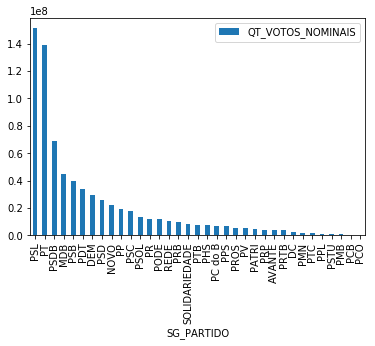

In [39]:
totalvotospartido.plot.bar(x='SG_PARTIDO', y='QT_VOTOS_NOMINAIS', rot=90)

In [42]:
dfeleitos = df[df.DS_SIT_TOT_TURNO != 'NÃO ELEITO']
dfeleitos = dfeleitos[dfeleitos.DS_SIT_TOT_TURNO != 'SUPLENTE']


In [43]:
dfeleitos.shape

(466428, 30)

In [44]:
dfeleitos.head()

,ANO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,TP_ABRANGENCIA,SG_UE,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_VOTO_EM_TRANSITO,QT_VOTOS_NOMINAIS
8,2018,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,E,MG,43710,CONTAGEM,313,Deputado Estadual,130000616551,17500,CARLOS HENRIQUE COELHO DE CAMPOS,CORONEL HENRIQUE,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,17,PSL,130000050443,PARTIDO ISOLADO,PSL,2,ELEITO POR QP,N,164
23,2018,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,E,MG,51012,RIO DO PRADO,149,Deputado Federal,130000620802,1010,GILBERTO APARECIDO ABRAMO,GILBERTO ABRAMO,#NULO#,12,APTO,2,DEFERIDO,Coligação,10,PRB,130000050539,#MINAS PARA TODOS,PDT / PV / PRB / MDB,2,ELEITO POR QP,N,3
26,2018,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,E,RR,3085,RORAINÓPOLIS,8,Deputado Federal,230000608387,2200,EDIO VIEIRA LOPES,EDIO LOPES,#NULO#,12,APTO,2,DEFERIDO,Coligação,22,PR,230000050219,RENOVAÇÃO DEMOCRÁTICA I,PR / PRTB,3,ELEITO POR MÉDIA,N,1086
60,2018,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,E,MG,52337,SÃO GONÇALO DO ABAETÉ,210,Deputado Estadual,130000613104,55444,LEANDRO ANDRADE GENARO OLIVEIRA,LEANDRO GENARO,#NULO#,12,APTO,2,DEFERIDO,Coligação,55,PSD,130000050353,JUNTOS PARA RECONSTRUIR MINAS,PSDB / PPS / DEM / PP / PSD,2,ELEITO POR QP,N,46
67,2018,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,E,SP,65994,JAMBEIRO,29,Deputado Federal,250000605455,1111,RICARDO IZAR JUNIOR,RICARDO IZAR,#NULO#,12,APTO,2,DEFERIDO,Coligação,11,PP,250000050157,PSDB-PSD-DEM-PP,PSDB / PSD / DEM / PP,2,ELEITO POR QP,N,47


In [49]:
dfeleitosnome = dfeleitos.groupby('NM_URNA_CANDIDATO')['QT_VOTOS_NOMINAIS'].sum().reset_index()

In [50]:
dfeleitosnome.sort_values(by='QT_VOTOS_NOMINAIS', ascending=False)

,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS
822,JAIR BOLSONARO,107074857
631,FERNANDO HADDAD,31342051
901,JOÃO DORIA,17421905
1416,ROMEU ZEMA,11102773
1048,MAJOR OLIMPIO,9039717
1625,WILSON WITZEL,7830126
1053,MARA GABRILLI,6513282
536,EDUARDO LEITE,5271920
1433,RUI COSTA,5096062
653,FLÁVIO BOLSONARO,4380418
